In [1]:
import numpy as np
import scipy.io
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

def dataloader(path):
    data = scipy.io.loadmat(path)
    AF = data['AF']
    modified_rows1 = AF[:-2]
    last_rows1 = AF[-2:]
    CF = data['CF']
    concatenated_array = np.concatenate((modified_rows1, CF,last_rows1), axis=0)
    new=concatenated_array
    u, count = np.unique(new[-1], return_counts=True)
    a = u[np.logical_or(count < 2, count > 2)]
    c = new[:, np.isin(new[-1], a, invert=True)]
    x = c[0:-2]; y = c[-2]; w = c[-1];
    return x.T, y.T, w.T, data['CF_info']

def calculate_accuracy(arr1, arr2):
    count = sum(1 for itr1, itr2 in zip(arr1, arr2) if itr1 == itr2)
    return count / len(arr1)

def normalization(feats):
    df = pd.DataFrame(feats)
    scaler = StandardScaler()
    x_new = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return x_new

def make_partitions(arr_words, arr_labels):
    v = []
    temp = []

    for i in range(len(arr_words) - 1):
        word = arr_words[i]
        next_word = arr_words[i + 1]
        temp.append(arr_labels[i])

        if word != next_word or i == len(arr_words) - 2:
            if i == len(arr_words) - 2:
                temp.append(arr_labels[i + 1])

            numpy_temp = np.array(temp)
            temp_max = np.amax(numpy_temp)
            numpy_temp = np.divide(numpy_temp, temp_max)
            v = np.concatenate((v, numpy_temp), axis=None)
            temp.clear()

    v1 = [1 if i == 1 else 0 for i in v]
    return v1
    
fatyp = 'TypicalFA_comb1'
drivepath = 'finalData/'+ fatyp +'/';
filee = drivepath+'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress.mat'
original_dim = 38
train_path = filee; test_path = filee.replace('train','test')
xtrain, ytrain, wtrain1, info_train1 = dataloader(train_path);
xtest, ytest, wtest1, info_test1 = dataloader(test_path);
xtest= normalization(xtest)
xtrain= normalization(xtrain)

woPP=[]; wPP=[]
input_shape1 = (19,1)
input_shape2 = (38,1)
temperature = 0.03
learning_rate=0.001

2023-06-14 05:00:09.260623: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# DBSCAN parameter optimization

In [117]:
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming xtrain is your input data with shape (5891, 38)

# Instantiate the DBSCAN object
dbscan = DBSCAN(eps=1, min_samples=5)

# Fit the DBSCAN model to the data
dbscan.fit(xtrain)

# Get the labels assigned by DBSCAN
labels = dbscan.labels_

# Convert the labels to binary (1 or 0) based on cluster assignment
labels_binary = np.where(labels == -1, 0, 1)

# Print the cluster labels
print(labels_binary)

[0 0 0 ... 0 0 0]


In [118]:
# Count the number of 1s
count_ones = np.count_nonzero(labels_binary == 1)

# Count the number of 0s
count_zeros = np.count_nonzero(labels_binary == 0)

# Print the counts
print("Number of 1s:", count_ones)
print("Number of 0s:", count_zeros)

Number of 1s: 61
Number of 0s: 3903


In [119]:
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming xtrain is your input data with shape (5891, 38)

# Instantiate the DBSCAN object
dbscan = DBSCAN(eps=2, min_samples=5)

# Fit the DBSCAN model to the data
dbscan.fit(xtrain)

# Get the labels assigned by DBSCAN
labels = dbscan.labels_

# Convert the labels to binary (1 or 0) based on cluster assignment
labels_binary = np.where(labels == -1, 0, 1)

# Print the cluster labels
print(labels_binary)

[1 0 1 ... 0 0 0]


In [120]:
# Count the number of 1s
count_ones = np.count_nonzero(labels_binary == 1)

# Count the number of 0s
count_zeros = np.count_nonzero(labels_binary == 0)

count_negatives = np.count_nonzero(labels_binary == -1)
# Print the counts
print("Number of 1s:", count_ones)
print("Number of 0s:", count_zeros)
print("Number of -1s:", count_negatives)

Number of 1s: 1349
Number of 0s: 2615
Number of -1s: 0


In [121]:
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming xtrain is your input data with shape (5891, 38)

# Instantiate the DBSCAN object
dbscan = DBSCAN(eps=2, min_samples=4)

# Fit the DBSCAN model to the data
dbscan.fit(xtrain)

# Get the labels assigned by DBSCAN
labels = dbscan.labels_

# Convert the labels to binary (1 or 0) based on cluster assignment
labels_binary = np.where(labels == -1, 0, 1)

# Print the cluster labels
print(labels_binary)

[1 0 1 ... 0 0 0]


In [122]:
# Count the number of 1s
count_ones = np.count_nonzero(labels_binary == 1)

# Count the number of 0s
count_zeros = np.count_nonzero(labels_binary == 0)

count_negatives = np.count_nonzero(labels_binary == -1)
# Print the counts
print("Number of 1s:", count_ones)
print("Number of 0s:", count_zeros)
print("Number of -1s:", count_negatives)

Number of 1s: 1618
Number of 0s: 2346
Number of -1s: 0


# Plotting

In [123]:
accuracy = calculate_accuracy(labels_binary, ytrain)
print(accuracy)

0.40615539858728555


In [124]:
size=len(labels_binary)
arr=np.zeros(size)

In [125]:
if(accuracy<0.5):
        cluster_0 = np.where(labels_binary == 0)[0]
        cluster_1 = np.where(labels_binary == 1)[0]
        arr[cluster_0] = 1
        arr[cluster_1] = 0
        accuracy=1-accuracy
else:
    cluster_0 = np.where(labels_binary == 0)[0]
    cluster_1 = np.where(labels_binary == 1)[0]
    arr[cluster_0] = 0
    arr[cluster_1] = 1

In [126]:
accuracy = calculate_accuracy(arr, ytrain)
print(accuracy)

0.5938446014127144


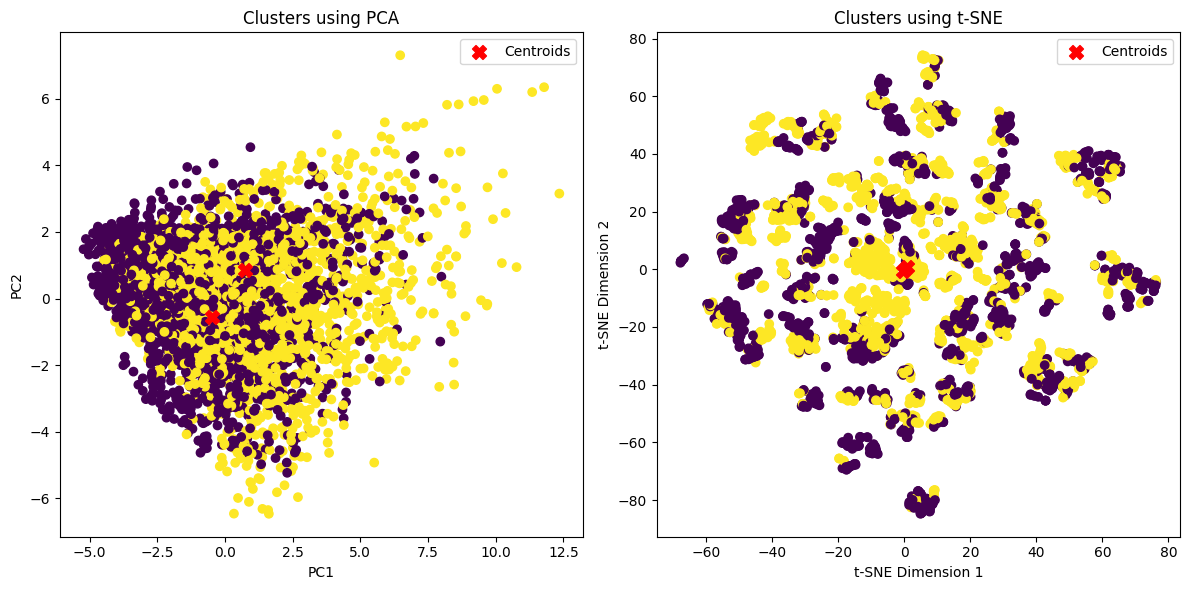

In [129]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming xtrain is your input data with shape (5891, 38)
# Assuming labels_binary is the cluster labels assigned by DBSCAN
# Assuming centroids is a numpy array containing the centroid coordinates

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xtrain)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ytrain, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=ytrain, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

k = 2  # Number of clusters you want to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(xtrain)
labels = kmeans.labels_

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xtrain)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ytrain, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=ytrain, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


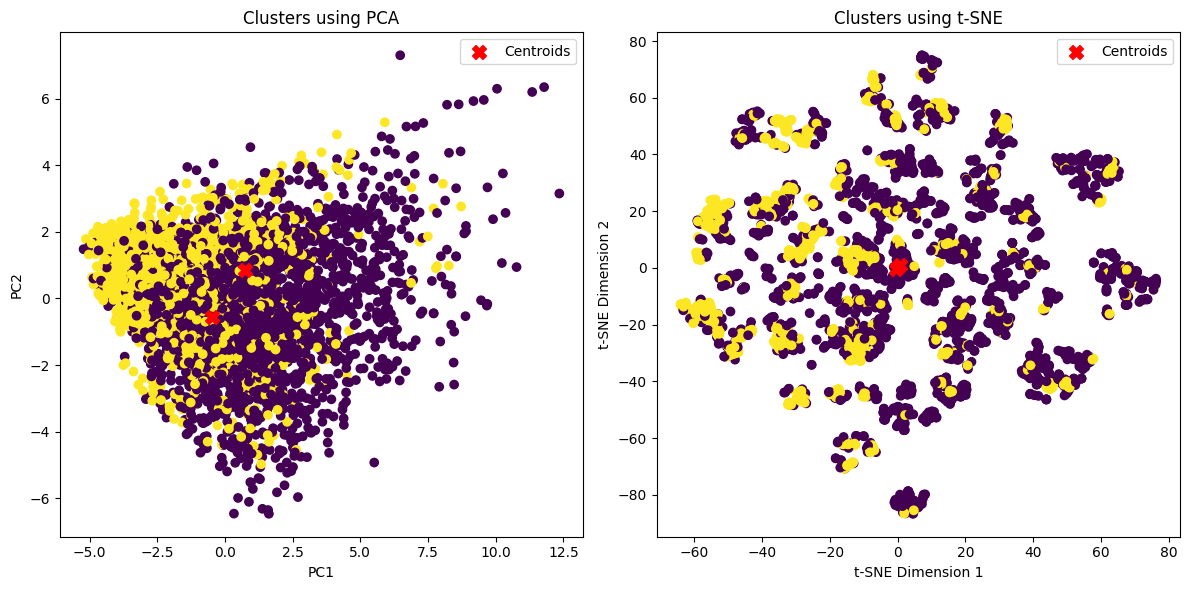

In [130]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming xtrain is your input data with shape (5891, 38)
# Assuming labels_binary is the cluster labels assigned by DBSCAN
# Assuming centroids is a numpy array containing the centroid coordinates

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xtrain)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels_binary, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels_binary, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


# Implementing Contrastive Loss (N-Pair)

In [132]:
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=temperature, name=None):
        super(SupervisedContrastiveLoss, self).__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        print(feature_vectors.shape)
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        logits = tf.divide(tf.matmul(feature_vectors_normalized, tf.transpose(feature_vectors_normalized)), self.temperature)
        return 0.35*(tfa.losses.npairs_loss(tf.squeeze(labels), logits))

In [133]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
xtra_a, xval_a, ytra_a, yval_a = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)
input_shape = (38,1)

In [135]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
xtra_a, xval_a, ytra_a, yval_a = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)
input_shape = (38,1)

In [134]:
class Encoder(Model):
  def __init__(self, latent_dim):
    super(Encoder, self).__init__()
    input_shape = (38,1)
    self.latent_dim = latent_dim 
    inputs = Input(shape=(38,1))
    outputs = inputs  
    self.encoder = tf.keras.Sequential([
      inputs,
      
      layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Dropout(0.5),
      layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    return encoded

latent_dim=30

def create_encoder():
    return Encoder(latent_dim)


def add_projection_head(Encoder):
    inp = keras.Input(shape=input_shape)
    hidden  = Encoder(inp)
    features = layers.Dense(16, activation="relu")(hidden)
    model = keras.Model(
        inputs=inp, outputs=features, name="cifar-encoder_with_projection-head"
    )
    return model

In [136]:
encoder = create_encoder()
encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(optimizer=keras.optimizers.Adam(learning_rate),loss=SupervisedContrastiveLoss(temperature))
encoder_with_projection_head.summary()
history = encoder_with_projection_head.fit(xtra_a, ytra_a , validation_data =(xval_a,yval_a), batch_size=32, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])

Model: "cifar-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 38, 1)]           0         
                                                                 
 encoder_5 (Encoder)         (None, 30)                38910     
                                                                 
 dense_11 (Dense)            (None, 16)                496       
                                                                 
Total params: 39,406
Trainable params: 39,406
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
(None, 16)
(None, 16)
100/100 [==============================] - 2s 7ms/step - loss: 1.2841 - val_loss: 1.1981
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 1.1967 - val_loss: 1.1875
Epoch 3/100
100/100 [==============================] - 0s 5ms/step -

In [137]:
trainoutputs = encoder_with_projection_head.predict(xtrain)

124/124 [==============================] - 0s 1ms/step


## TSNE FOR ENCODER ON TRAIN WITH EMBEDDED OUTPUT

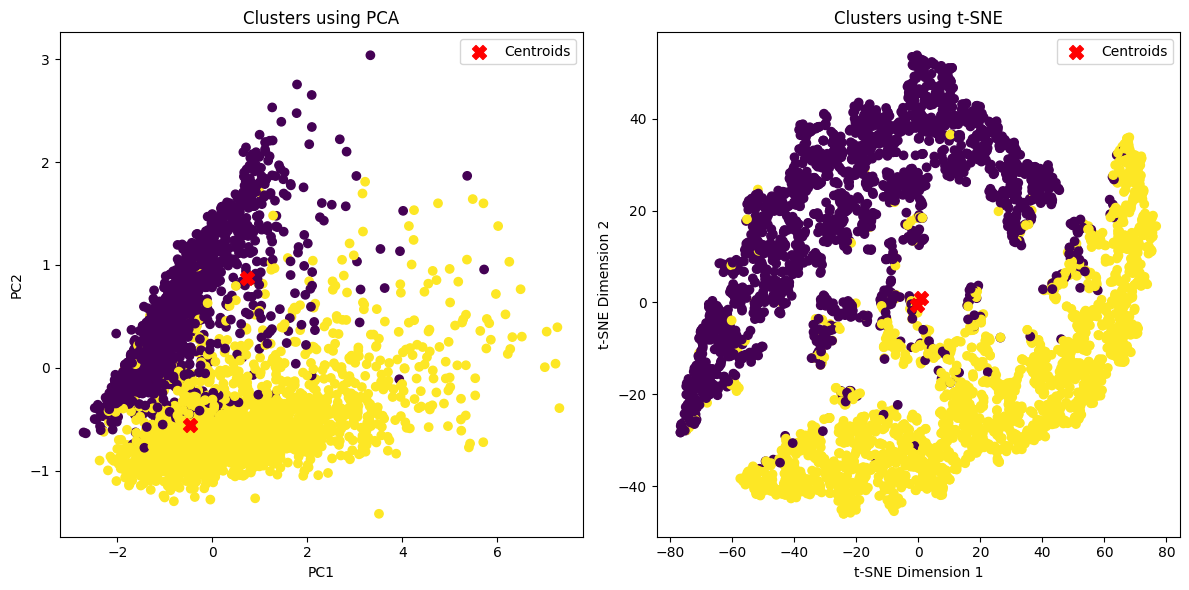

In [145]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming xtrain is your input data with shape (5891, 38)
# Assuming labels_binary is the cluster labels assigned by DBSCAN
# Assuming centroids is a numpy array containing the centroid coordinates

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(trainoutputs)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(trainoutputs)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ytrain, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=ytrain, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


## TSNE FOR ENCODER ON TRAIN WITH DBSCAN CLUSTERING

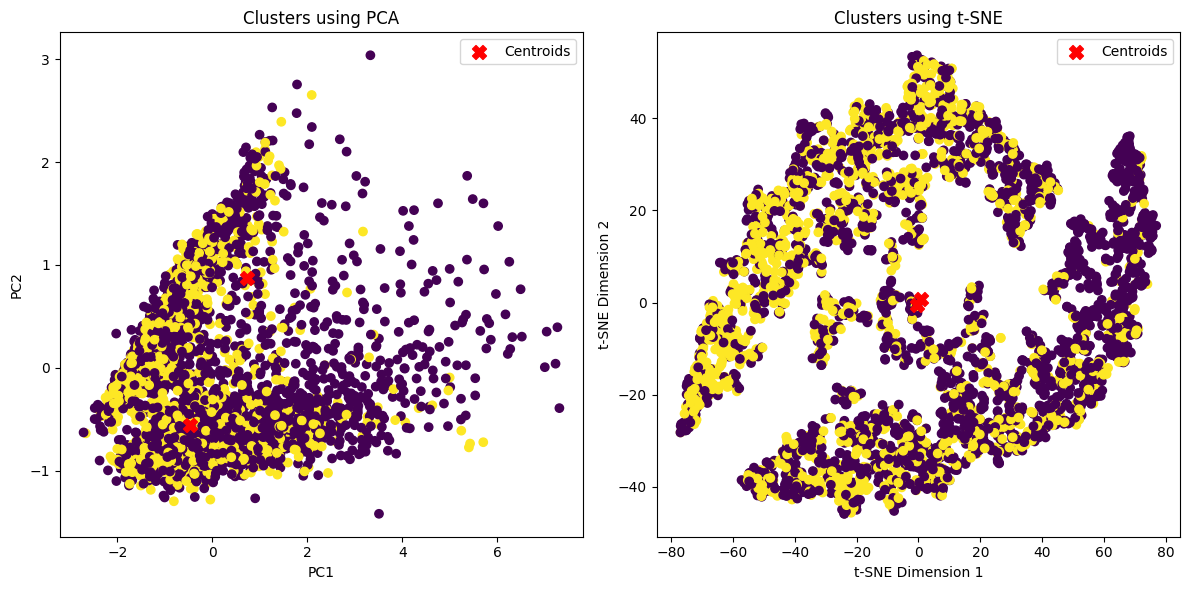

In [151]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming xtrain is your input data with shape (5891, 38)
# Assuming labels_binary is the cluster labels assigned by DBSCAN
# Assuming centroids is a numpy array containing the centroid coordinates

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(trainoutputs)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(trainoutputs)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels_binary, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels_binary, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [149]:
testoutputs = encoder_with_projection_head.predict(xtest)

103/103 [==============================] - 0s 2ms/step


## TSNE FOR ENCODER ON TRAIN WITH EMBEDDED OUTPUT

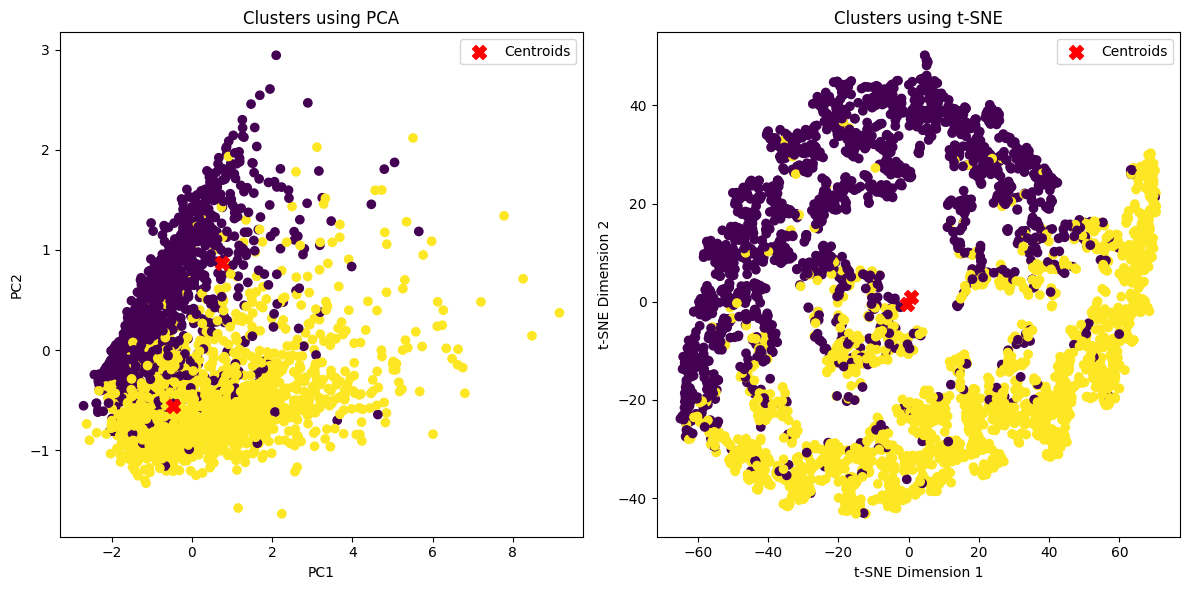

In [150]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming xtrain is your input data with shape (5891, 38)
# Assuming labels_binary is the cluster labels assigned by DBSCAN
# Assuming centroids is a numpy array containing the centroid coordinates

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(testoutputs)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(testoutputs)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ytest, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=ytest, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()